In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Importing Datset

In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

Dataset Contains 12 columns and 891 rows.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_describe=df_train.describe()
df_describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


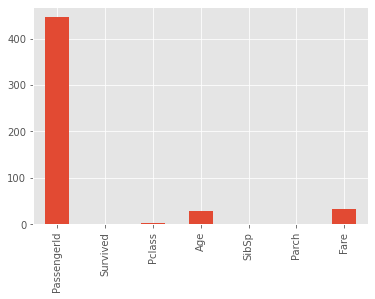

In [7]:
plt.style.use('ggplot')
df_describe.loc['mean'].plot.bar()

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Observations:

* In the dataset we have to predict the servived or not servived hence problem is regression.
* As observed using barplot for mean of each columns which shows variations among the columns.
* Null values are present is the 'age' and 'cabin' columns.
* There are '0' values also present in the 'SibSp','Parch' and 'Fare' columns.
* 'PassengerId' column we can drop as no use of any id columns,further we will check in feature engineering.
* Outliars seems in 'Fare' column. will check in further analysis.

### NaN Treatment :

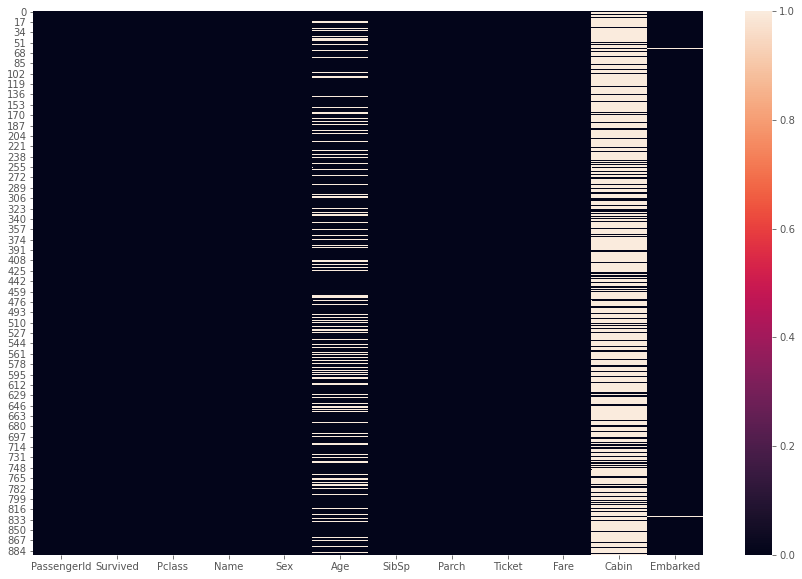

In [9]:
#visualizing the null data using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_train.isnull())

In [10]:
#Checking the unique values in age columns
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
#Checking the unique values in Cabin columns
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
#Checking the unique values in Embarked columns
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
#using mean function to fil the missing value in 'sex' column
df_train['Age']=df_train['Age'].fillna(df_train.groupby("Sex")['Age'].transform("mean"))

In [14]:
#using mode function to fil the missing value in 'Cabin' column
df_train['Cabin']=df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])

In [15]:
#using mode function to fil the missing value in 'Embarked' column
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [16]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

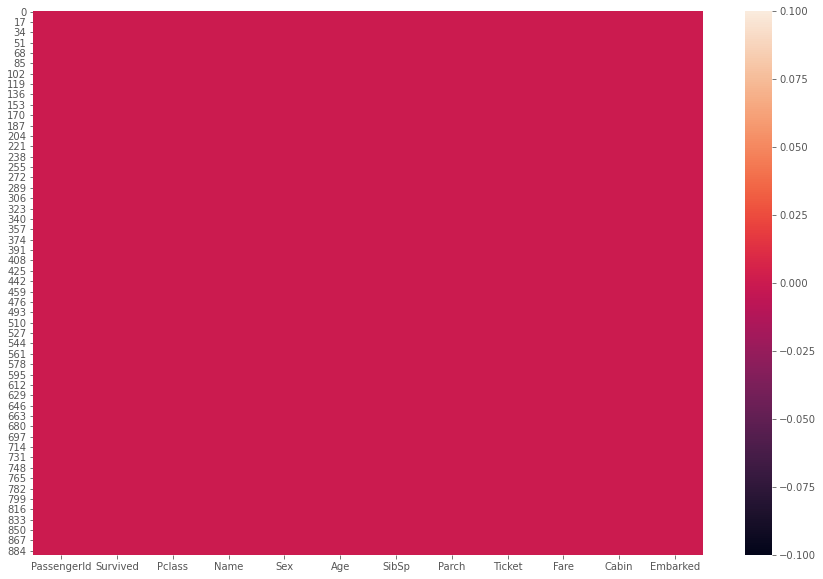

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.isnull())

## Exploratry Data Analysis (EDA)

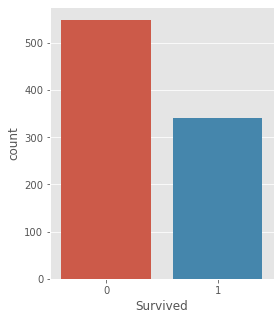

In [18]:
# Checking the count of Survived using countplot
plt.figure(figsize=(4,5),facecolor='white')
sns.countplot(x='Survived',data=df_train)

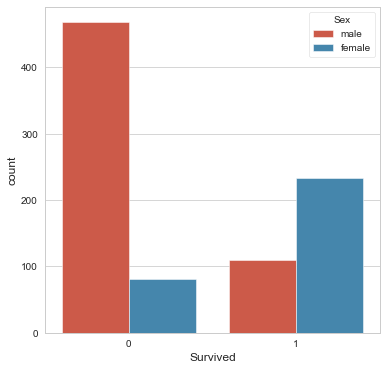

In [19]:
# Checking the servivers count as per gender wise
plt.figure(figsize=(6,6),facecolor='white')
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train)

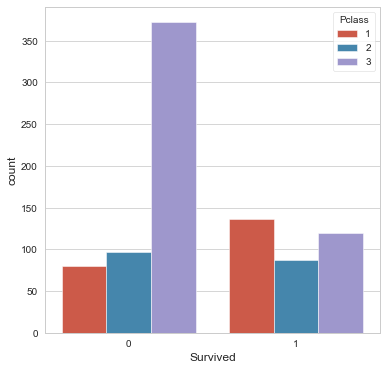

In [20]:
# Checking the servivers count as per class
plt.figure(figsize=(6,6),facecolor='white')
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train)

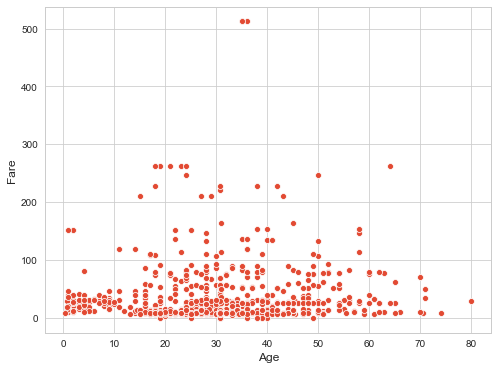

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Fare',data=df_train)

As we can see above,most of data point varying under 300 fare but there are 2 point which is covering 500 fare it could
be an outliars.

### Outliars Detection & Removel

In [22]:
#filttering the 'int' and 'float' columns
# df_numeric = df_train.select_dtypes('int','float')
# df_numeric.columns
df_numeric = df_train[['Survived','Pclass','Age','SibSp','Parch','Fare']]
df_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


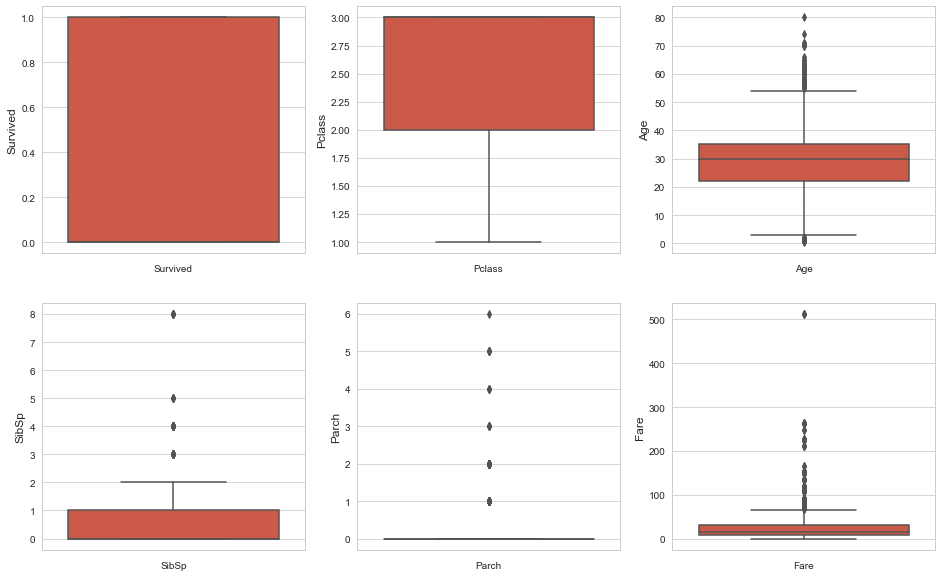

In [23]:
plt.figure(figsize=(16,10))
plotnumber = 1
for i in df_numeric:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df_numeric[i],orient='v')
        plt.xlabel(i,fontsize=10)
        plotnumber+=1

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
power = PowerTransformer(method='yeo-johnson')

In [26]:
df_train['Age'] = power.fit_transform(df_train['Age'].values.reshape(-1,1))

In [27]:
df_train['SibSp'] = power.fit_transform(df_train['SibSp'].values.reshape(-1,1))

In [28]:
df_train['Fare'] = power.fit_transform(df_train['Fare'].values.reshape(-1,1))

In [29]:
df_numeric1 = df_train[['Survived','Pclass','Age','SibSp','Parch','Fare']]
df_numeric1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


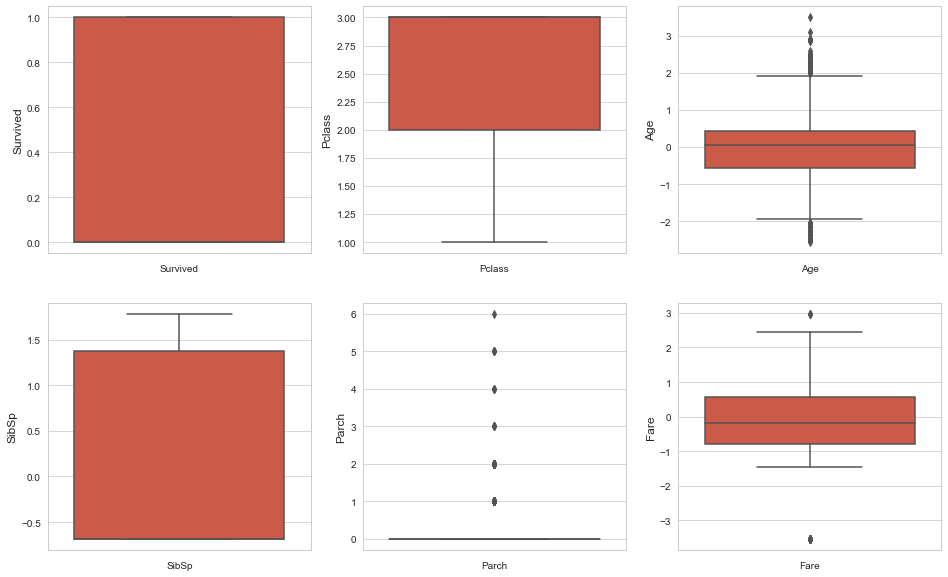

In [30]:
plt.figure(figsize=(16,10))
plotnumber = 1
for i in df_numeric1:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df_numeric1[i],orient='v')
        plt.xlabel(i,fontsize=10)
        plotnumber+=1

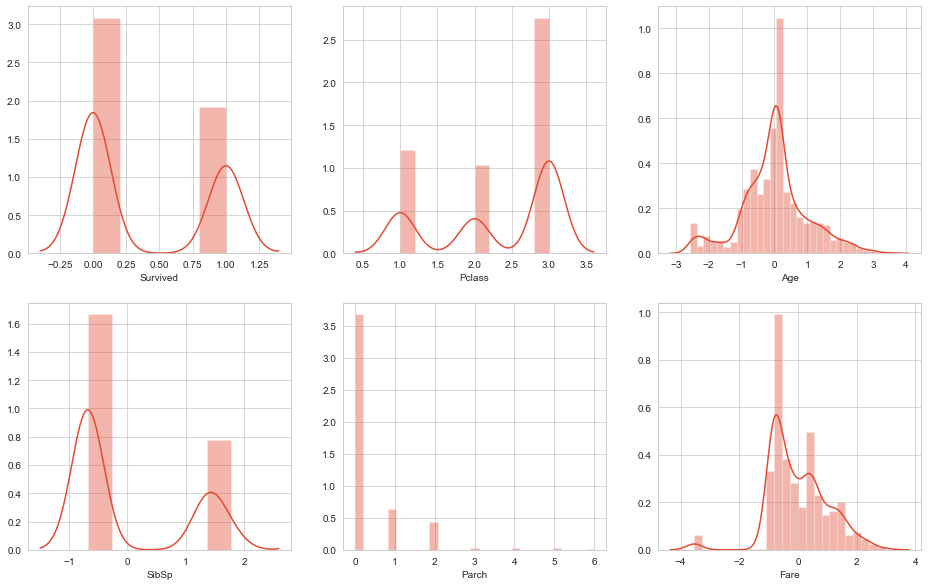

In [31]:
plt.figure(figsize=(16,10))
plotnumber = 1
for i in df_numeric1:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df_numeric1[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1

Removing Skwness from fare column :

In [32]:
max_threshold = df_train['Fare'].quantile(0.98)
max_threshold

2.273779972126005

In [33]:
df_train[df_train['Fare']>max_threshold]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,-0.801073,1.718889,2,19950,2.451466,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,-0.479534,1.718889,2,19950,2.451466,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,-0.400694,-0.679850,1,PC 17558,2.402544,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,0.434357,-0.679850,0,PC 17755,2.971192,B96 B98,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,1.503299,-0.679850,1,PC 17558,2.402544,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,-0.883178,1.642413,2,PC 17608,2.449552,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,-0.400694,1.718889,2,19950,2.451466,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,-0.167430,-0.679850,2,113503,2.274411,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,0.941434,-0.679850,0,PC 17757,2.334148,B96 B98,C
438,439,0,1,"Fortune, Mr. Mark",male,2.450720,1.373636,4,19950,2.451466,C23 C25 C27,S


In [34]:
min_threshold = df_train['Fare'].quantile(0.1)
min_threshold

-0.8384246404658469

In [35]:
df_train[df_train['Fare']<min_threshold]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.558960,1.373636,0,A/5 21171,-0.878820,B96 B98,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,-0.097134,-0.679850,0,2649,-0.882259,B96 B98,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,0.116249,-0.679850,0,2631,-0.882259,B96 B98,C
36,37,1,3,"Mamee, Mr. Hanna",male,0.116249,-0.679850,0,2677,-0.881680,B96 B98,C
57,58,0,3,"Novel, Mr. Mansouer",male,-0.052486,-0.679850,0,2697,-0.881680,B96 B98,C
...,...,...,...,...,...,...,...,...,...,...,...,...
843,844,0,3,"Lemberopolous, Mr. Peter L",male,0.397499,-0.679850,0,2683,-0.996877,B96 B98,C
859,860,0,3,"Razi, Mr. Raihed",male,0.116249,-0.679850,0,2629,-0.881680,B96 B98,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,0.286365,-0.679850,0,695,-1.245281,B51 B53 B55,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,-1.134339,-0.679850,0,2667,-0.882259,B96 B98,C


In [36]:
df_train1 = df_train[(df_train['Fare']<max_threshold) & (df_train['Fare']>min_threshold)]

In [37]:
df_train1.shape

(779, 12)

In [38]:
df_numeric3 = df_train1[['Survived','Pclass','Age','SibSp','Parch','Fare']]
df_numeric3.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

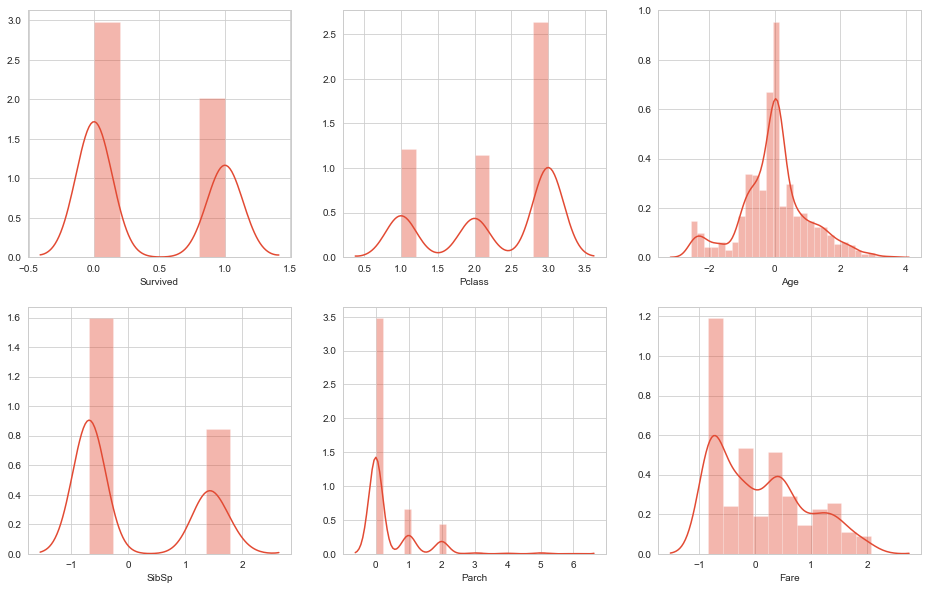

In [39]:
plt.figure(figsize=(16,10))
plotnumber = 1
for i in df_numeric3:
    if plotnumber <= 6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df_numeric3[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1

Removeing the some columns :

In [40]:
df_new=df_train1.drop(['Cabin','Name','PassengerId','Ticket','Cabin'],axis=1)

In [41]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,0.653645,1.373636,0,1.336651,C
2,1,3,female,-0.244667,-0.679850,0,-0.790065,S
3,1,1,female,0.434357,1.373636,0,1.067352,S
4,0,3,male,0.434357,-0.679850,0,-0.774439,S
5,0,3,male,0.116249,-0.679850,0,-0.725002,Q


### Encoding Categorical Variables :

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
df_new.Sex = le.fit_transform(df_new.Sex)

In [45]:
df_new.Embarked = le.fit_transform(df_new.Embarked)

In [46]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,0.653645,1.373636,0,1.336651,0
2,1,3,0,-0.244667,-0.679850,0,-0.790065,2
3,1,1,0,0.434357,1.373636,0,1.067352,2
4,0,3,1,0.434357,-0.679850,0,-0.774439,2
5,0,3,1,0.116249,-0.679850,0,-0.725002,1


### Feature Selection : 

Univariate Selection :

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

Spliting the Data :

In [48]:
X = df_new.drop(['Survived'],axis=1)
y = df_new['Survived']

In [49]:
# featurs_rank = SelectKBest(score_func=chi2,k='all')
model = ExtraTreesClassifier()

In [50]:
model.fit(X,y)

ExtraTreesClassifier()

In [51]:
print(model.feature_importances_)

[0.10660626 0.26006468 0.2646145  0.04630705 0.0507548  0.2306254
 0.04102731]


In [52]:
fearures_rank = pd.Series(model.feature_importances_,index=X.columns)
fearures_rank

Pclass      0.106606
Sex         0.260065
Age         0.264614
SibSp       0.046307
Parch       0.050755
Fare        0.230625
Embarked    0.041027
dtype: float64

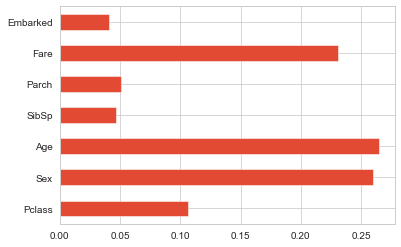

In [53]:
fearures_rank.plot(kind='barh')

This technique gives a score for each feature of our data,the higher the score more relative it is.

## Model Building :

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=111)

Importing libraries for model building......!

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()

print("Model is created")

Model is created


In [62]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [63]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))

Lr classification score 0.797945205479452
knn classification score 0.827054794520548
dt classification score 0.9811643835616438
rf classification score 0.9811643835616438
adb classification score 0.8356164383561644
svm classification score 0.8167808219178082


In [64]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)

### Model Evaluation

Using confusion matrix in order to evaluate the models accuracy.

In [65]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[90 21]
 [23 61]]


In [66]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for lr_model",'\n',knn_conf_mat)

confusion matrix for lr_model 
 [[93 18]
 [18 66]]


In [67]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for lr_model",'\n',dt_conf_mat)

confusion matrix for lr_model 
 [[91 20]
 [26 58]]


In [68]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[94 17]
 [18 66]]


In [69]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[89 22]
 [21 63]]


In [70]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for lr_model",'\n',svm_conf_mat)

confusion matrix for lr_model 
 [[93 18]
 [17 67]]


In [72]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" adb classification_report" ,'\n',svm_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       111
           1       0.74      0.73      0.73        84

    accuracy                           0.77       195
   macro avg       0.77      0.77      0.77       195
weighted avg       0.77      0.77      0.77       195

 knn classification_report 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       111
           1       0.79      0.79      0.79        84

    accuracy                           0.82       195
   macro avg       0.81      0.81      0.81       195
weighted avg       0.82      0.82      0.82       195

 dt classification_report 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       111
           1       0.74      0.69      0.72        84

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76

### ROC AND AUC :

for performance measurement..........!

In [85]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [86]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))

0.7685006435006435
0.8117760617760617
0.7551480051480052
0.8162805662805662
0.7759009009009009
0.8177284427284428


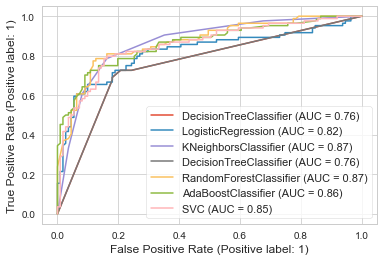

In [87]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

## CrossValidation :

In [88]:
from sklearn.model_selection import KFold,cross_val_score

In [89]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [90]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5))

Cross validation score for lr model => [0.76923077 0.79487179 0.75641026 0.78846154 0.79354839]
Cross validation score for knn model => [0.75       0.77564103 0.80128205 0.78846154 0.78064516]
Cross validation score for dt model => [0.75641026 0.76282051 0.74358974 0.73717949 0.79354839]
Cross validation score for rf model => [0.79487179 0.80128205 0.82051282 0.78205128 0.83870968]
Cross validation score for adb model => [0.72435897 0.80128205 0.77564103 0.81410256 0.80645161]
Cross validation score for adb model => [0.83333333 0.81410256 0.78205128 0.80769231 0.82580645]


In [93]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5).mean())

Mean of Cross validation score for lr model => 0.7805045492142265
Mean of Cross validation score for knn model => 0.7792059553349875
Mean of Cross validation score for dt model => 0.7586848635235732
Mean of Cross validation score for rf model => 0.7959470636889991
Mean of Cross validation score for adb model => 0.7843672456575682
Cross validation score for SVM model => 0.8125971877584781


In the cross validation i found our 'Random forest model' can be a good predictor for our problem statemnet.and In oder to increase the chances of accuracy we will check the hyperparameter tuning.

### HyperParameter Tuning !

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
rf.get_params().keys()  # to check the parameters

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [101]:
parm_grid  = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4],'min_samples_split':[2,3],
              'max_leaf_nodes':[3,5,6,8,10]}
parm_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4],
 'min_samples_split': [2, 3],
 'max_leaf_nodes': [3, 5, 6, 8, 10]}

In [102]:
gridsearch = GridSearchCV(rf, param_grid = parm_grid , cv=5)

In [103]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_leaf_nodes': [3, 5, 6, 8, 10],
                         'min_samples_split': [2, 3]})

In [104]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 8,
 'min_samples_split': 2}

In [105]:
random_forest=RandomForestClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=8,min_samples_split=2)

In [106]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=8)

In [107]:
random_forest.score(X_train,y_train)

0.821917808219178

After using the hyperparameter tuning We achived the 82% accuracy and without it was 0.98%

## Model saving

In [108]:
import pickle

In [109]:
filename = 'Titanic.pickle'

In [110]:
pickle.dump(dt,open(filename,'wb'))

### Thank You........!